<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [4]:
from google.colab import drive

drive.mount('/content/mydrive')

link = '/content/mydrive/MyDrive/Alura ciencia de dados/Datascience/Regressao_linear_testando_relacoes_prevendo_resultados/Exercicio/dados/HousePrices_HalfMil.csv'

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


## Visualizar os dados

In [6]:
df = pd.read_csv(link, sep=';')
df.head(5)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [7]:
df.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [9]:
df.describe().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.0000,1000.000,1000.0000,1000.0000,1000.0000,1000.0000,1000.000
mean,41985.6000,124.326,2.0090,3.0000,2.0340,0.3310,0.485
std,12140.3854,72.390,0.8134,1.4297,1.4188,0.4708,0.500
min,13150.0000,1.000,1.0000,1.0000,0.0000,0.0000,0.000
25%,33112.5000,60.750,1.0000,2.0000,1.0000,0.0000,0.000
50%,41725.0000,123.000,2.0000,3.0000,2.0000,0.0000,0.000
75%,51175.0000,187.000,3.0000,4.0000,3.0000,1.0000,1.000
max,73675.0000,249.000,3.0000,5.0000,4.0000,1.0000,1.000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [10]:
df.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


<Axes: >

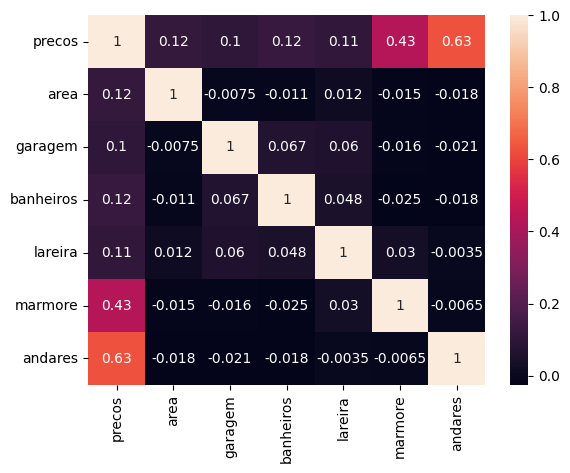

In [11]:
sns.heatmap(df.corr().round(4), annot=True)

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [12]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [13]:
sns.set_palette("Blues_r")
sns.set_style("darkgrid")

In [14]:
df.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0.5, 1.0, 'Preços outliers')

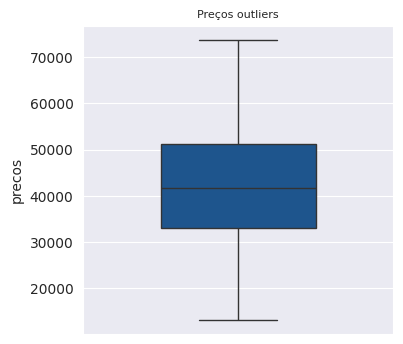

In [20]:
ax = sns.boxplot(data = df, y ='precos', orient = 'v', width = 0.5)
ax.figure.set_size_inches(4,4)
ax.set_title('Preços outliers',fontsize = 8)
#ax.set_xlabel('andares',fontsize = 8)
#ax.set_ylabel('Preços',fontsize = 8)

Text(0.5, 1.0, 'Variação de preços outliers')

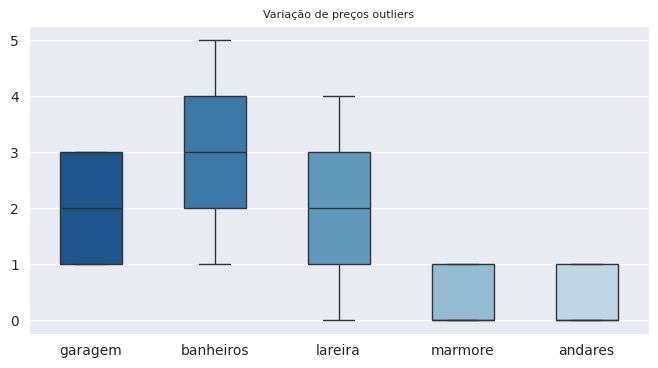

In [31]:
ax = sns.boxplot(data = df.drop(['precos','area'],axis=1),  orient = 'v', width = 0.5)
ax.figure.set_size_inches(8,4)
ax.set_title('Variação de preços outliers',fontsize = 8)
#'garagem','banheiros','lareira','marmore','andares'

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

Text(0, 0.5, 'Preços')

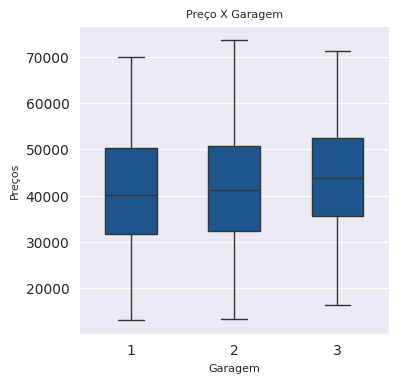

In [36]:
ax = sns.boxplot(data = df,x = 'garagem', y ='precos', orient = 'v', width = 0.5)
ax.figure.set_size_inches(4,4)
ax.set_title('Preço X Garagem',fontsize = 8)
ax.set_xlabel('Garagem',fontsize = 8)
ax.set_ylabel('Preços',fontsize = 8)

### Box-plot (Preço X Banheiros)

Text(0, 0.5, 'Preços')

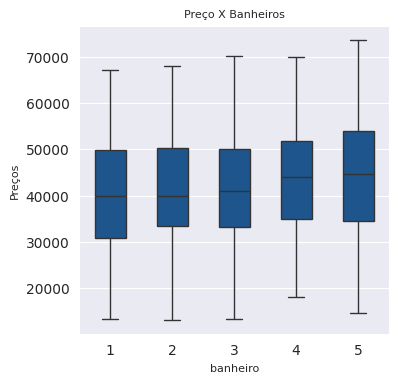

In [37]:
ax = sns.boxplot(data = df,x = 'banheiros', y ='precos', orient = 'v', width = 0.5)
ax.figure.set_size_inches(4,4)
ax.set_title('Preço X Banheiros',fontsize = 8)
ax.set_xlabel('banheiro',fontsize = 8)
ax.set_ylabel('Preços',fontsize = 8)

### Box-plot (Preço X Lareira)

Text(0, 0.5, 'Preços')

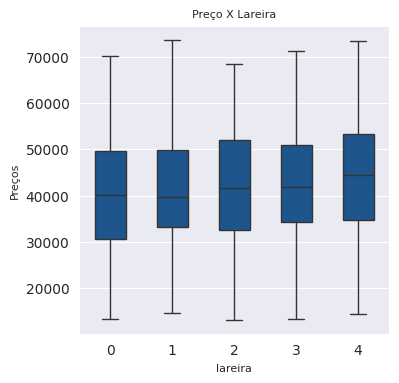

In [38]:
ax = sns.boxplot(data = df,x = 'lareira', y ='precos', orient = 'v', width = 0.5)
ax.figure.set_size_inches(4,4)
ax.set_title('Preço X Lareira',fontsize = 8)
ax.set_xlabel('lareira',fontsize = 8)
ax.set_ylabel('Preços',fontsize = 8)

### Box-plot (Preço X Acabamento em Mármore)

Text(0, 0.5, 'Preços')

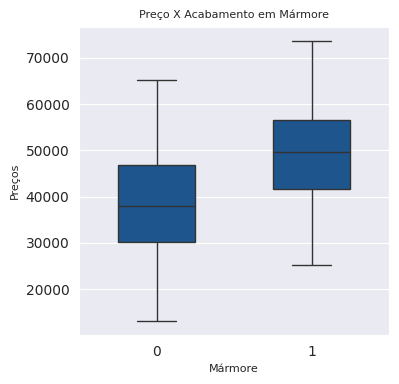

In [39]:
ax = sns.boxplot(data = df,x = 'marmore', y ='precos', orient = 'v', width = 0.5)
ax.figure.set_size_inches(4,4)
ax.set_title('Preço X Acabamento em Mármore',fontsize = 8)
ax.set_xlabel('Mármore',fontsize = 8)
ax.set_ylabel('Preços',fontsize = 8)

### Box-plot (Preço X Andares)

Text(0, 0.5, 'Preços')

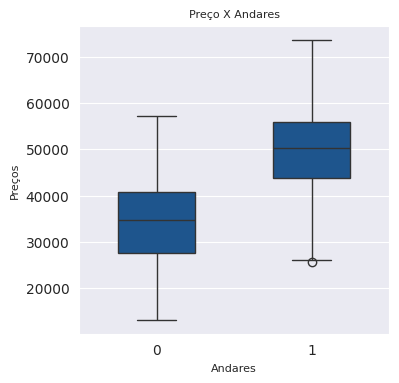

In [41]:
ax = sns.boxplot(data = df,x = 'andares', y ='precos', orient = 'v', width = 0.5)
ax.figure.set_size_inches(4,4)
ax.set_title('Preço X Andares',fontsize = 8)
ax.set_xlabel('Andares',fontsize = 8)
ax.set_ylabel('Preços',fontsize = 8)

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

Text(0.5, 1.0, 'Distribuição de Frequência')

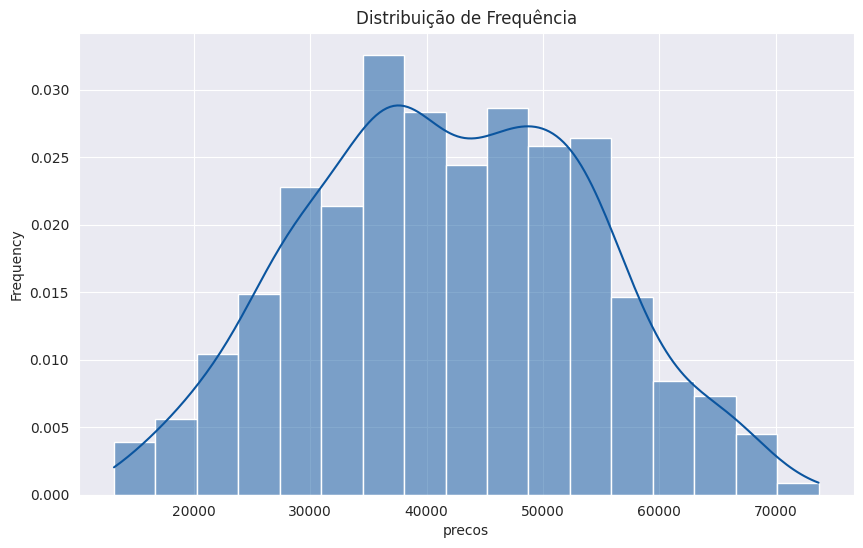

In [43]:
ax = sns.histplot(df.precos,kde= True,  stat="frequency")
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição de Frequência', fontsize = 12)


## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

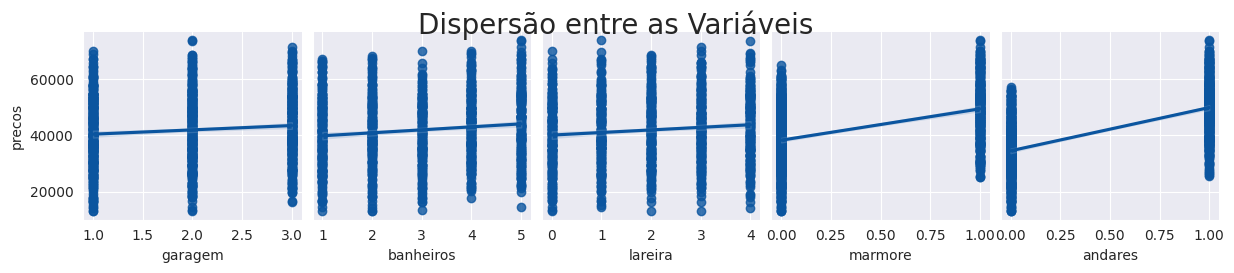

In [131]:
ax = sns.pairplot(df,x_vars = ['garagem','banheiros','lareira','marmore','andares'], y_vars ='precos', kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize = 20, y = 1.05)
ax

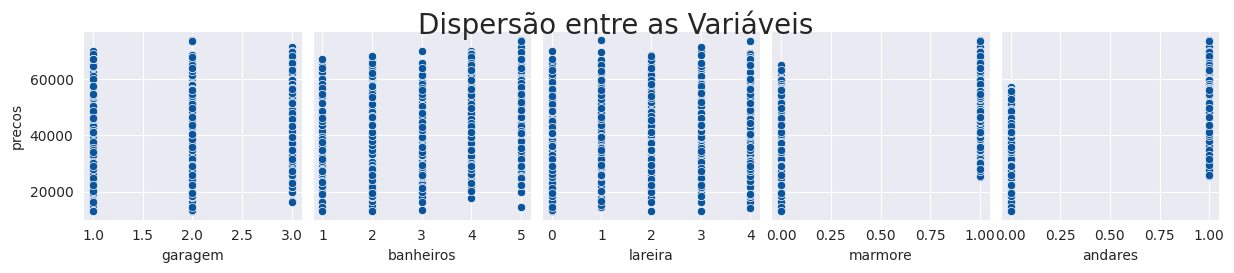

In [133]:
ax = sns.pairplot(df,x_vars = ['garagem','banheiros','lareira','marmore','andares'], y_vars ='precos')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize = 20, y = 1.05)
ax


# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [74]:
y = df.precos

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [88]:
X = df.drop(['precos'],axis=1)

## Criando os datasets de treino e de teste

In [134]:
x_treino,x_teste, y_treino, y_teste = train_test_split(X , y , random_state = 2811, test_size = 0.3)

In [135]:
x_treino.shape

(700, 6)

In [136]:
y_treino.shape

(700,)

In [137]:
x_teste.shape

(300, 6)

In [138]:
y_teste.shape

(300,)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [140]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [141]:
modelo.fit(x_treino, y_treino)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [156]:
# codigo do 2 -> alt 1021
print(f'R² = {modelo.score(x_treino,y_treino) * 100:.2f}%')

R² = 63.62%


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [143]:
y_previsto = modelo.predict(x_teste)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [144]:
print(f'R² = {metrics.r2_score(y_teste,y_previsto) * 100:.2f}%')

R² = 67.00%


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [145]:
entrada = x_teste[0:1]
entrada

,area,garagem,banheiros,lareira,marmore,andares
402,38,2,4,4,0,1


In [146]:
modelo.predict(entrada)

array([46389.80475709])

In [147]:
df.head(5)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


In [148]:
area = 35
garagem = 2
banheiros = 4
lareira = 1
marmore = 0
andares = 1

entrada = [[area,	garagem, banheiros, lareira, marmore, andares]]

print(f'{modelo.predict(entrada)[0]:.2f} Preços')

44339.23 Preços


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [157]:
EQM = metrics.mean_squared_error(y_teste, y_previsto).round(2)

#calculando a raíz
REQM = np.sqrt(EQM).round(2)

R2 = metrics.r2_score(y_teste, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM','REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,50197019.50
REQM,7084.99
R²,0.67


## Obtendo métricas para o modelo com Temperatura Máxima

In [149]:
modelo.intercept_

19186.256916902617

In [150]:
modelo.coef_

array([   24.56333637,  1803.50885155,  1291.41973815,   658.96198367,
       11131.76457634, 14861.5964676 ])

In [151]:
X.columns


Index(['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], dtype='object')

In [152]:
index = ['Intercepto' , 'area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']

In [153]:
import numpy as np
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])


,Parâmetros
Intercepto,19186.256917
area,24.563336
garagem,1803.508852
banheiros,1291.419738
lareira,658.961984
marmore,11131.764576
andares,14861.596468


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [158]:
import pickle

## Salvando o modelo estimado

In [159]:
output = open('modelo_preco_apartamento','wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```